<a href="https://colab.research.google.com/github/Mishabz4321/NATURAL-LANGUAGE-PROCESSING/blob/main/TWITTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.shape

(7613, 5)

In [ ]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

We will be dropping location column and all the tweets with missing keyword

In [ ]:
df= df[~df['keyword'].isna()]

In [ ]:
df.shape

(7552, 5)

In [ ]:
df= df.drop(['location'], axis=1)

In [ ]:
df.head()

,id,keyword,text,target
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,Crying out for more! Set me ablaze,0
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [ ]:
df= df[~df['target'].isna()]

In [ ]:
df.shape

(7552, 4)

In [ ]:
df['text'].describe().T

count                                                  7552
unique                                                 7447
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [ ]:
df['target'].value_counts()

0    4323
1    3229
Name: target, dtype: int64

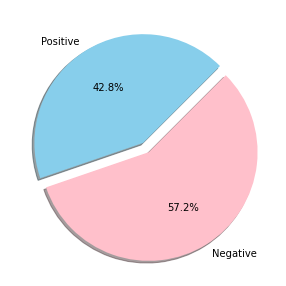

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=df[df['target']==1]
neg=df[df['target']==0]
ck=[pos['target'].count(),neg['target'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

## WORD COUNT
#### Splitting sentences in to words and counting no.of word in each sentence

In [ ]:
df['word_count']= df['text'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head()

,id,keyword,text,target,word_count
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,5
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,10
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,9
34,52,ablaze,Crying out for more! Set me ablaze,0,7
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,13


## CHARECTERS COUNT
#### Calculating length of each sentence

In [ ]:
df['char_counts'] = df['text'].apply(lambda x: len(x))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,5,55
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,10,67
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,9,82
34,52,ablaze,Crying out for more! Set me ablaze,0,7,34
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,13,76


## AVG. WORD LENGTH
#### Average word length in each sentence

In [ ]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [ ]:
df['avg_word_len']= df['text'].apply(get_avg_word_len)

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,5,55,10.200000
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,10,67,5.800000
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,9,82,8.222222
34,52,ablaze,Crying out for more! Set me ablaze,0,7,34,4.000000
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,13,76,4.923077


## Calculating STOPWORDS

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
print(STOP_WORDS)

{'back', 'up', 'had', 'thru', 'down', 'whereafter', 'should', 'too', 'me', 'anyone', 'move', 'among', 'be', 'this', 'elsewhere', 'since', '’s', 'become', 'more', 'until', 'from', 'when', 'off', "'re", 'also', 'via', '’d', 'the', 'mostly', 'not', 'above', 'further', 'put', 'became', '‘ve', 'thereupon', 'through', 'throughout', 'an', 'hers', 'six', 'a', 'another', 'does', 'see', 'each', 'however', 'before', 'anything', 'none', 'amount', 'fifty', 'hundred', 'have', 'along', 'both', 'used', 'so', 'why', 'hereby', 'wherever', '’ll', 'beforehand', 'whole', 'which', 'sixty', 'he', 'well', 'around', 'besides', 'at', 'seeming', 'in', 'few', 'fifteen', 'now', 'per', 'last', 'several', 'itself', '‘s', 'mine', 'give', 'perhaps', 'again', 'seemed', 'becomes', 'sometime', 'can', 'first', 'nevertheless', 'n‘t', 'although', 'serious', "'ll", 'these', 'whom', 'becoming', 'who', 'eight', 'formerly', 'i', 'your', 'namely', 'then', 'yours', 'into', 'beyond', 'nowhere', 'been', 'various', 'less', 'because'

In [ ]:
df['stopword_len']= df['text'].apply(lambda x: len( [t for t in x.split() if t in set(STOP_WORDS)]))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,5,55,10.200000,0
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,10,67,5.800000,3
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,9,82,8.222222,1
34,52,ablaze,Crying out for more! Set me ablaze,0,7,34,4.000000,3
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,13,76,4.923077,1


## CALCULATING NO.OF WORDS STARTS WITH '@' AND '#'

In [ ]:
df['hashtags_count'] = df['text'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['text'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,5,55,10.200000,0,0,1
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,10,67,5.800000,3,2,0
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,9,82,8.222222,1,1,0
34,52,ablaze,Crying out for more! Set me ablaze,0,7,34,4.000000,3,0,0
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,13,76,4.923077,1,0,0


## COUNTING NO.OF DIGITS IN EACH TWEET

In [ ]:
df['numerics_count'] = df['text'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,5,55,10.200000,0,0,1,0
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,10,67,5.800000,3,2,0,0
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,9,82,8.222222,1,1,0,0
34,52,ablaze,Crying out for more! Set me ablaze,0,7,34,4.000000,3,0,0,0
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,13,76,4.923077,1,0,0,0


## UPPER case words count

In [ ]:
df['upper_counts'] = df['text'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,5,55,10.200000,0,0,1,0,0
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,10,67,5.800000,3,2,0,0,1
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,9,82,8.222222,1,1,0,0,1
34,52,ablaze,Crying out for more! Set me ablaze,0,7,34,4.000000,3,0,0,0,0
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,13,76,4.923077,1,0,0,0,9


## Preprocessing and Cleaning

In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower())

##  Converting all short words to their respective fullwords based on the words defined in the dictionary and using function cont_to_exp().

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
%%time
df['text'] = df['text'].apply(lambda x: cont_to_exp(x))

CPU times: user 190 ms, sys: 3 µs, total: 190 ms
Wall time: 193 ms


In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts
31,48,ablaze,@bbcmtd wholesale markets ablaze http://t.co/l...,1,5,55,10.200000,0,0,1,0,0
32,49,ablaze,we always try to bring the heavy. #metal #rt h...,0,10,67,5.800000,3,2,0,0,1
33,50,ablaze,#africanbaze: breaking news:nigeria flag set a...,1,9,82,8.222222,1,1,0,0,1
34,52,ablaze,crying out for more! set me ablaze,0,7,34,4.000000,3,0,0,0,0
35,53,ablaze,on plus side look at the sky last night it was...,0,13,76,4.923077,1,0,0,0,9


## Counting Emails

In [ ]:
import re
df['emails'] = df['text'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails
31,48,ablaze,@bbcmtd wholesale markets ablaze http://t.co/l...,1,5,55,10.200000,0,0,1,0,0,[]
32,49,ablaze,we always try to bring the heavy. #metal #rt h...,0,10,67,5.800000,3,2,0,0,1,[]
33,50,ablaze,#africanbaze: breaking news:nigeria flag set a...,1,9,82,8.222222,1,1,0,0,1,[]
34,52,ablaze,crying out for more! set me ablaze,0,7,34,4.000000,3,0,0,0,0,[]
35,53,ablaze,on plus side look at the sky last night it was...,0,13,76,4.923077,1,0,0,0,9,[]


In [ ]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [ ]:
df[df['emails_count']>0]

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
2254,3229,deluged,@thesewphist whoever holds the address 'fuckfa...,0,16,108,5.8125,8,0,1,0,0,[fuckface@wineisdumb.com],1


In [ ]:
df['text'] = df['text'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))

## Counting HTML Tags and Removing It

In [ ]:
df['urls_flag'] = df['text'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
31,48,ablaze,@bbcmtd wholesale markets ablaze http://t.co/l...,1,5,55,10.200000,0,0,1,0,0,[],0,1
32,49,ablaze,we always try to bring the heavy. #metal #rt h...,0,10,67,5.800000,3,2,0,0,1,[],0,1
33,50,ablaze,#africanbaze: breaking news:nigeria flag set a...,1,9,82,8.222222,1,1,0,0,1,[],0,1
34,52,ablaze,crying out for more! set me ablaze,0,7,34,4.000000,3,0,0,0,0,[],0,0
35,53,ablaze,on plus side look at the sky last night it was...,0,13,76,4.923077,1,0,0,0,9,[],0,1


In [ ]:
df['text'] = df['text'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
31,48,ablaze,@bbcmtd wholesale markets ablaze,1,5,55,10.200000,0,0,1,0,0,[],0,1
32,49,ablaze,we always try to bring the heavy. #metal #rt,0,10,67,5.800000,3,2,0,0,1,[],0,1
33,50,ablaze,#africanbaze: breaking news:nigeria flag set a...,1,9,82,8.222222,1,1,0,0,1,[],0,1
34,52,ablaze,crying out for more! set me ablaze,0,7,34,4.000000,3,0,0,0,0,[],0,0
35,53,ablaze,on plus side look at the sky last night it was...,0,13,76,4.923077,1,0,0,0,9,[],0,1


## Removing Retweets

In [ ]:
df['text'] = df['text'].apply(lambda x: re.sub('RT', "", x))
df['text'] = df['text'].apply(lambda x: re.sub('rt', "", x))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
31,48,ablaze,@bbcmtd wholesale markets ablaze,1,5,55,10.200000,0,0,1,0,0,[],0,1
32,49,ablaze,we always try to bring the heavy. #metal #,0,10,67,5.800000,3,2,0,0,1,[],0,1
33,50,ablaze,#africanbaze: breaking news:nigeria flag set a...,1,9,82,8.222222,1,1,0,0,1,[],0,1
34,52,ablaze,crying out for more! set me ablaze,0,7,34,4.000000,3,0,0,0,0,[],0,0
35,53,ablaze,on plus side look at the sky last night it was...,0,13,76,4.923077,1,0,0,0,9,[],0,1


In [ ]:
df.iloc[0]['text']

'@bbcmtd wholesale markets ablaze '

In [ ]:
df.iloc[3]['text']

'crying out for more! set me ablaze'

## Special Chars removal or punctuation removal

In [ ]:
df['text'] = df['text'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
31,48,ablaze,bbcmtd wholesale markets ablaze,1,5,55,10.200000,0,0,1,0,0,[],0,1
32,49,ablaze,we always try to bring the heavy metal,0,10,67,5.800000,3,2,0,0,1,[],0,1
33,50,ablaze,africanbaze breaking newsnigeria flag set abla...,1,9,82,8.222222,1,1,0,0,1,[],0,1
34,52,ablaze,crying out for more set me ablaze,0,7,34,4.000000,3,0,0,0,0,[],0,0
35,53,ablaze,on plus side look at the sky last night it was...,0,13,76,4.923077,1,0,0,0,9,[],0,1


## Remove multiple spaces

In [ ]:
x = 'thanks    for    watching and    please    like this video'

In [ ]:
x.split()

['thanks', 'for', 'watching', 'and', 'please', 'like', 'this', 'video']

In [ ]:
' '.join(x.split())

'thanks for watching and please like this video'

In [ ]:
df['text'] = df['text'].apply(lambda x: " ".join(x.split()))

## Removing HTML tags

In [ ]:
df['text']= df['text'].apply(lambda x: re.sub('<[^>]*>','',x))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
31,48,ablaze,bbcmtd wholesale markets ablaze,1,5,55,10.200000,0,0,1,0,0,[],0,1
32,49,ablaze,we always try to bring the heavy metal,0,10,67,5.800000,3,2,0,0,1,[],0,1
33,50,ablaze,africanbaze breaking newsnigeria flag set abla...,1,9,82,8.222222,1,1,0,0,1,[],0,1
34,52,ablaze,crying out for more set me ablaze,0,7,34,4.000000,3,0,0,0,0,[],0,0
35,53,ablaze,on plus side look at the sky last night it was...,0,13,76,4.923077,1,0,0,0,9,[],0,1


## Remove Accented Chars

In [ ]:
import unicodedata

In [ ]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
df['text']= df['text'].apply(remove_accented_chars)

## Remove stop words



In [ ]:
df['text'] = df['text'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [ ]:
df.head()

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
31,48,ablaze,bbcmtd wholesale markets ablaze,1,5,55,10.200000,0,0,1,0,0,[],0,1
32,49,ablaze,try bring heavy metal,0,10,67,5.800000,3,2,0,0,1,[],0,1
33,50,ablaze,africanbaze breaking newsnigeria flag set abla...,1,9,82,8.222222,1,1,0,0,1,[],0,1
34,52,ablaze,crying set ablaze,0,7,34,4.000000,3,0,0,0,0,[],0,0
35,53,ablaze,plus look sky night ablaze,0,13,76,4.923077,1,0,0,0,9,[],0,1


## Convert into base or root form of word

In [ ]:
import spacy
nlp= spacy.load('en_core_web_sm')


In [ ]:
def make_to_base(x):
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        return lemma

In [ ]:
df['text']= df['text'].apply(make_to_base)

KeyboardInterrupt: ignored

## Common words removal

In [ ]:
tweets= ' '.join(df['text'])

In [ ]:
tweets

'bbcmtd wholesale markets ablaze try bring heavy metal africanbaze breaking newsnigeria flag set ablaze aba crying set ablaze plus look sky night ablaze phdsquares mufc built hype new acquisitions doubt set epl ablaze season inec office abia set ablaze - barbados bridgetown jamaica cars set ablaze santa cruz head st elizabeth police superintende ablaze lord d check nsfw outside youre ablaze alivebut youre dead inside awesome time visiting cfc head office ancop site ablaze thanks tita vida taking care soooo pumped ablaze southridgelife wanted set chicago ablaze preaching hotel gained 3 followers week know stats grow west burned thousands wildfires ablaze california building perfect tracklist life leave streets ablaze check nsfw night retainers weird better wear single night year deputies man shot brighton home set ablaze man wife years jail setting ablaze niece santa cruz head st elizabeth police superintendent lanford salmon r - police arsonist deliberately set black church noh carolin

In [ ]:
tweets= tweets.split()

In [ ]:
tweets

['bbcmtd',
 'wholesale',
 'markets',
 'ablaze',
 'try',
 'bring',
 'heavy',
 'metal',
 'africanbaze',
 'breaking',
 'newsnigeria',
 'flag',
 'set',
 'ablaze',
 'aba',
 'crying',
 'set',
 'ablaze',
 'plus',
 'look',
 'sky',
 'night',
 'ablaze',
 'phdsquares',
 'mufc',
 'built',
 'hype',
 'new',
 'acquisitions',
 'doubt',
 'set',
 'epl',
 'ablaze',
 'season',
 'inec',
 'office',
 'abia',
 'set',
 'ablaze',
 '-',
 'barbados',
 'bridgetown',
 'jamaica',
 'cars',
 'set',
 'ablaze',
 'santa',
 'cruz',
 'head',
 'st',
 'elizabeth',
 'police',
 'superintende',
 'ablaze',
 'lord',
 'd',
 'check',
 'nsfw',
 'outside',
 'youre',
 'ablaze',
 'alivebut',
 'youre',
 'dead',
 'inside',
 'awesome',
 'time',
 'visiting',
 'cfc',
 'head',
 'office',
 'ancop',
 'site',
 'ablaze',
 'thanks',
 'tita',
 'vida',
 'taking',
 'care',
 'soooo',
 'pumped',
 'ablaze',
 'southridgelife',
 'wanted',
 'set',
 'chicago',
 'ablaze',
 'preaching',
 'hotel',
 'gained',
 '3',
 'followers',
 'week',
 'know',
 'stats',
 'g

In [ ]:
freq_comm = pd.Series(tweets).value_counts()

In [ ]:
freq_comm

-             772
like          343
amp           298
fire          245
new           226
             ... 
colonel         1
frontin         1
de-railing      1
acquired        1
sunshine        1
Length: 17739, dtype: int64

In [ ]:
f20 = freq_comm[:20]
f20

-             772
like          343
amp           298
fire          245
new           226
people        193
news          185
video         164
2             158
emergency     155
disaster      150
police        138
body          125
burning       120
crash         116
storm         115
time          113
suicide       113
california    112
got           111
dtype: int64

In [ ]:
df['text'] = df['text'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

## Rare words removal

In [ ]:
rare20 = freq_comm[-20:]

In [ ]:
rare20

bcpoli                    1
wheels-io                 1
-on                       1
promo                     1
abha                      1
ayhhhhhdjjfjrjjrdjjeks    1
olliebailey11             1
campb1g                   1
sposroadhouse             1
awash                     1
glided                    1
fnaf                      1
pathfinders               1
knowlddge                 1
grinds                    1
colonel                   1
frontin                   1
de-railing                1
acquired                  1
sunshine                  1
dtype: int64

In [ ]:
rare = freq_comm[freq_comm.values == 1]

In [ ]:
rare

theblaze       1
stephanenny    1
jeremyduns     1
inspect        1
sedan          1
              ..
colonel        1
frontin        1
de-railing     1
acquired       1
sunshine       1
Length: 11387, dtype: int64

In [ ]:
df['text'] = df['text'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

## Word Cloud Visualization

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x= ' '.join(tweets[:20000])

In [ ]:
x

'bbcmtd wholesale markets ablaze try bring heavy metal africanbaze breaking newsnigeria flag set ablaze aba crying set ablaze plus look sky night ablaze phdsquares mufc built hype new acquisitions doubt set epl ablaze season inec office abia set ablaze - barbados bridgetown jamaica cars set ablaze santa cruz head st elizabeth police superintende ablaze lord d check nsfw outside youre ablaze alivebut youre dead inside awesome time visiting cfc head office ancop site ablaze thanks tita vida taking care soooo pumped ablaze southridgelife wanted set chicago ablaze preaching hotel gained 3 followers week know stats grow west burned thousands wildfires ablaze california building perfect tracklist life leave streets ablaze check nsfw night retainers weird better wear single night year deputies man shot brighton home set ablaze man wife years jail setting ablaze niece santa cruz head st elizabeth police superintendent lanford salmon r - police arsonist deliberately set black church noh carolin

In [ ]:
len(tweets)

65818

In [ ]:
len(x)

141876

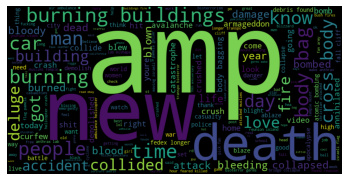

In [ ]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction

In [ ]:
from textblob import TextBlob

In [ ]:
def correct_spells(x):
  
  x = TextBlob(x).correct()
  return x

In [ ]:
df['text']= df['text'].apply(correct_spells)

KeyboardInterrupt: ignored

In [ ]:
df

,id,keyword,text,target,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
31,48,ablaze,bbcmtd wholesale markets ablaze,1,5,55,10.200000,0,0,1,0,0,[],0,1
32,49,ablaze,try bring heavy metal,0,10,67,5.800000,3,2,0,0,1,[],0,1
33,50,ablaze,africanbaze breaking newsnigeria flag set abla...,1,9,82,8.222222,1,1,0,0,1,[],0,1
34,52,ablaze,crying set ablaze,0,7,34,4.000000,3,0,0,0,0,[],0,0
35,53,ablaze,plus look sky night ablaze,0,13,76,4.923077,1,0,0,0,9,[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7578,10830,wrecked,jtruff23 cameronhacker wrecked,0,7,48,6.000000,3,0,2,0,1,[],0,0
7579,10831,wrecked,days work pretty wrecked hahaha shoutout family,0,20,107,4.400000,11,0,0,0,0,[],0,0
7580,10832,wrecked,fx forex trading cramer igers 3 words wrecked ...,0,12,93,6.833333,1,3,0,1,1,[],0,1
7581,10833,wrecked,engineshed great atmosphere british lion gig t...,0,13,104,7.076923,3,0,1,0,0,[],0,1


In [ ]:
df1= df.copy()

In [ ]:
X= df1.drop(['id', 'keyword', 'text','emails', ''], axis=1)

In [ ]:
X= X.drop(['target'], axis=1)

In [ ]:
X.reset_index(inplace=True)

In [ ]:
y= df1['target']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
text_tfidf = tfidf.fit_transform(df1['text'])

In [ ]:
text_tfidf_df= pd.DataFrame(text_tfidf.toarray(), columns=tfidf.get_feature_names())

In [ ]:
text_tfidf_df.head()

,0011,001116,0025,005225,01,010156,010217,0104,010401,0111,012032,012624,015025,02,0215,03,0306,030811,033,034,0400,045,05,05082015,05th,06,0605,061,063243,063424,06jst,07,070,0700,0730,075,08,080,0800,080215,...,zeros,zhejiang,zhenghxn,zicac,zimbabwe,zimmer,zimmerman,zimpapersviews,zionism,zionist,zionists,zip,ziphimup,zipped,zippednews,zipper,zippers,zippoline,ziuw,zmne,zodiac,zojadelin,zomatoaus,zombie,zombiefunrun2014,zombies,zone,zones,zonesthank,zonewolf123,zoom,zotar50,zouma,zourrya,zrnf,zss,zumiez,zurich,zxathetis,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.drop(['index'],axis=1, inplace=True)

In [ ]:
X

,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag
0,5,55,10.200000,0,0,1,0,0,0,1
1,10,67,5.800000,3,2,0,0,1,0,1
2,9,82,8.222222,1,1,0,0,1,0,1
3,7,34,4.000000,3,0,0,0,0,0,0
4,13,76,4.923077,1,0,0,0,9,0,1
...,...,...,...,...,...,...,...,...,...,...
7547,7,48,6.000000,3,0,2,0,1,0,0
7548,20,107,4.400000,11,0,0,0,0,0,0
7549,12,93,6.833333,1,3,0,1,1,0,1
7550,13,104,7.076923,3,0,1,0,0,0,1


In [ ]:
text_tfidf_df.reset_index()

,level_0,0011,001116,0025,005225,01,010156,010217,0104,010401,0111,012032,012624,015025,02,0215,03,0306,030811,033,034,0400,045,05,05082015,05th,06,0605,061,063243,063424,06jst,07,070,0700,0730,075,08,080,0800,...,zeros,zhejiang,zhenghxn,zicac,zimbabwe,zimmer,zimmerman,zimpapersviews,zionism,zionist,zionists,zip,ziphimup,zipped,zippednews,zipper,zippers,zippoline,ziuw,zmne,zodiac,zojadelin,zomatoaus,zombie,zombiefunrun2014,zombies,zone,zones,zonesthank,zonewolf123,zoom,zotar50,zouma,zourrya,zrnf,zss,zumiez,zurich,zxathetis,zzzz
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7547,7547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7548,7548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7549,7549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7550,7550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
text_tfidf_df.shape

(7552, 17408)

In [ ]:
X.shape

(7552, 10)

In [ ]:
X_joined_features= pd.concat([X, text_tfidf_df], axis=1)

In [ ]:
X_joined_features

,word_count,char_counts,avg_word_len,stopword_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag,0011,001116,0025,005225,01,010156,010217,0104,010401,0111,012032,012624,015025,02,0215,03,0306,030811,033,034,0400,045,05,05082015,05th,06,0605,061,063243,063424,...,zeros,zhejiang,zhenghxn,zicac,zimbabwe,zimmer,zimmerman,zimpapersviews,zionism,zionist,zionists,zip,ziphimup,zipped,zippednews,zipper,zippers,zippoline,ziuw,zmne,zodiac,zojadelin,zomatoaus,zombie,zombiefunrun2014,zombies,zone,zones,zonesthank,zonewolf123,zoom,zotar50,zouma,zourrya,zrnf,zss,zumiez,zurich,zxathetis,zzzz
0,5,55,10.200000,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,67,5.800000,3,2,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,82,8.222222,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,34,4.000000,3,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,76,4.923077,1,0,0,0,9,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7547,7,48,6.000000,3,0,2,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7548,20,107,4.400000,11,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7549,12,93,6.833333,1,3,0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7550,13,104,7.076923,3,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
nb= MultinomialNB()
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [ ]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'NB':nb, 'RFC': rfc}

In [ ]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'NB', 'RFC'])

In [ ]:
#here, we are training our model by defining the function classify.

def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

In [ ]:
classify(X_joined_features, y)

SGD  --->  0.7657180675049636
LGR  --->  0.7835870284579749
LGR-CV  --->  0.7796161482461945
SVM  --->  0.7690271343481139
NB  --->  0.7835870284579749
RFC  --->  0.7531436135009927


In [ ]:
x= 'helo hu ar yuo'
doc= nlp(x)

## Word2Vec